In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')

# Display the first few rows
print(df.head())


   Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           1

In [2]:
import re
import string
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Apply the clean_text function to the 'review' column
df['clean_review'] = df['review'].apply(clean_text)

# Display the cleaned text
print(df[['review', 'clean_review']].head())


                                              review  \
0  "It has no side effect, I take it in combinati...   
1  "My son is halfway through his fourth week of ...   
2  "I used to take another oral contraceptive, wh...   
3  "This is my first time using any form of birth...   
4  "Suboxone has completely turned my life around...   

                                        clean_review  
0  it has no side effect i take it in combination...  
1  my son is halfway through his fourth week of i...  
2  i used to take another oral contraceptive whic...  
3  this is my first time using any form of birth ...  
4  suboxone has completely turned my life around ...  


In [3]:
from textblob import TextBlob

# Apply TextBlob to get sentiment polarity
df['sentiment'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Convert sentiment polarity to binary labels
df['label'] = df['sentiment'].apply(lambda x: 1 if x >= 0 else 0)

print(df[['clean_review', 'sentiment', 'label']].head())


                                        clean_review  sentiment  label
0  it has no side effect i take it in combination...   0.000000      1
1  my son is halfway through his fourth week of i...   0.168333      1
2  i used to take another oral contraceptive whic...   0.067210      1
3  this is my first time using any form of birth ...   0.179545      1
4  suboxone has completely turned my life around ...   0.194444      1


In [4]:
# Drop the 'review' column
df = df.drop(columns=['review'])

# Display the first few rows of the updated DataFrame
print(df.head())


   Unnamed: 0                  drugName                     condition  rating  \
0      206461                 Valsartan  Left Ventricular Dysfunction     9.0   
1       95260                Guanfacine                          ADHD     8.0   
2       92703                    Lybrel                 Birth Control     5.0   
3      138000                Ortho Evra                 Birth Control     8.0   
4       35696  Buprenorphine / naloxone             Opiate Dependence     9.0   

                date  usefulCount  \
0       May 20, 2012           27   
1     April 27, 2010          192   
2  December 14, 2009           17   
3   November 3, 2015           10   
4  November 27, 2016           37   

                                        clean_review  sentiment  label  
0  it has no side effect i take it in combination...   0.000000      1  
1  my son is halfway through his fourth week of i...   0.168333      1  
2  i used to take another oral contraceptive whic...   0.067210      1 

In [5]:
df

,Unnamed: 0,drugName,condition,rating,date,usefulCount,clean_review,sentiment,label
0,206461,Valsartan,Left Ventricular Dysfunction,9.0,"May 20, 2012",27,it has no side effect i take it in combination...,0.000000,1
1,95260,Guanfacine,ADHD,8.0,"April 27, 2010",192,my son is halfway through his fourth week of i...,0.168333,1
2,92703,Lybrel,Birth Control,5.0,"December 14, 2009",17,i used to take another oral contraceptive whic...,0.067210,1
3,138000,Ortho Evra,Birth Control,8.0,"November 3, 2015",10,this is my first time using any form of birth ...,0.179545,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,9.0,"November 27, 2016",37,suboxone has completely turned my life around ...,0.194444,1
...,...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,10.0,"May 31, 2015",125,i wrote my first report in midoctober of i h...,0.262917,1
161293,127085,Metoclopramide,Nausea/Vomiting,1.0,"November 1, 2011",34,i was given this in iv before surgey i immedia...,-0.276389,0
161294,187382,Orencia,Rheumatoid Arthritis,2.0,"March 15, 2014",35,limited improvement after months developed ba...,-0.223810,0
161295,47128,Thyroid desiccated,Underactive Thyroid,10.0,"September 19, 2015",79,been on thyroid medication years i spent my ...,0.212597,1


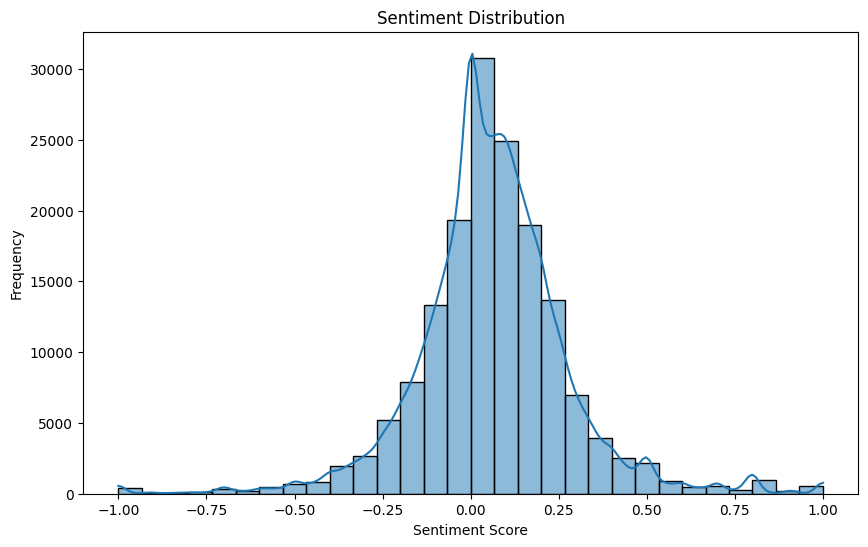

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True, bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [7]:

positive_reviews = df.sort_values(by='sentiment', ascending=False).head(10)
print("Most Positive Reviews:")
print(positive_reviews[['clean_review', 'sentiment']])


negative_reviews = df.sort_values(by='sentiment').head(10)
print("Most Negative Reviews:")
print(negative_reviews[['clean_review', 'sentiment']])

Most Positive Reviews:
                                             clean_review  sentiment
155808                                            awesome        1.0
155870  this medicine is the best thing that ever happ...        1.0
119172                              the best in every way        1.0
82311   the best ssri beat depression anxiety and obse...        1.0
99862   after trying carbidopalevadopa mirapex requip ...        1.0
99854     excellent control but caused me lactic acidosis        1.0
154645                the best thing  ever happened to me        1.0
80069                                 best sleep medicine        1.0
64472                     it worked perfectly  recommend         1.0
125963  perfect for the immediate relief of panic or a...        1.0
Most Negative Reviews:
                                             clean_review  sentiment
11943   took ambien slept for two hours woke up and vo...       -1.0
8031    caused horrible testicle  reproductive  urinar...

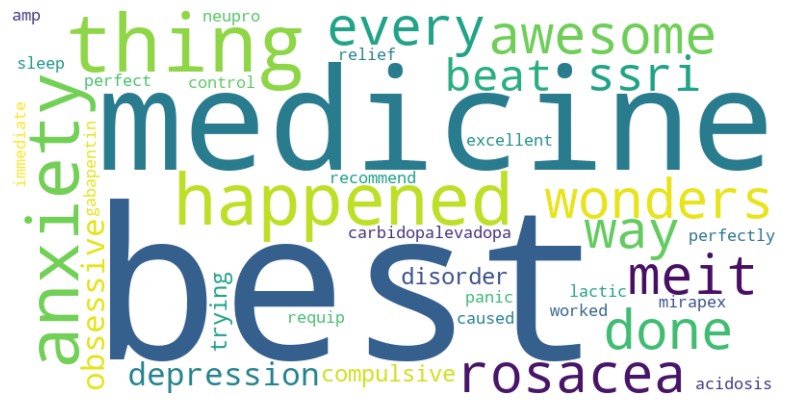

In [8]:
from collections import Counter
from wordcloud import WordCloud

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()



positive_text = positive_reviews['clean_review'].tolist()
generate_wordcloud(positive_text)

# Generate word cloud for negative reviews


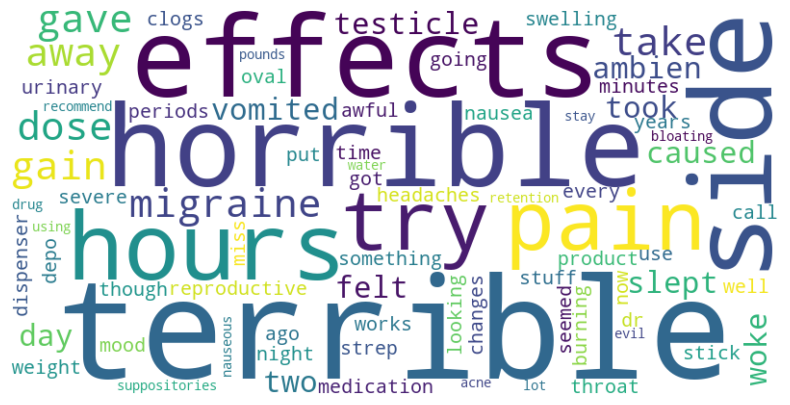

In [9]:
negative_text = negative_reviews['clean_review'].tolist()
generate_wordcloud(negative_text)



In [10]:
X = df['clean_review'] 
y = df['label'] # Display the first few rows to verify 
print(X.head()) 
print(y.head())

0    it has no side effect i take it in combination...
1    my son is halfway through his fourth week of i...
2    i used to take another oral contraceptive whic...
3    this is my first time using any form of birth ...
4    suboxone has completely turned my life around ...
Name: clean_review, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64


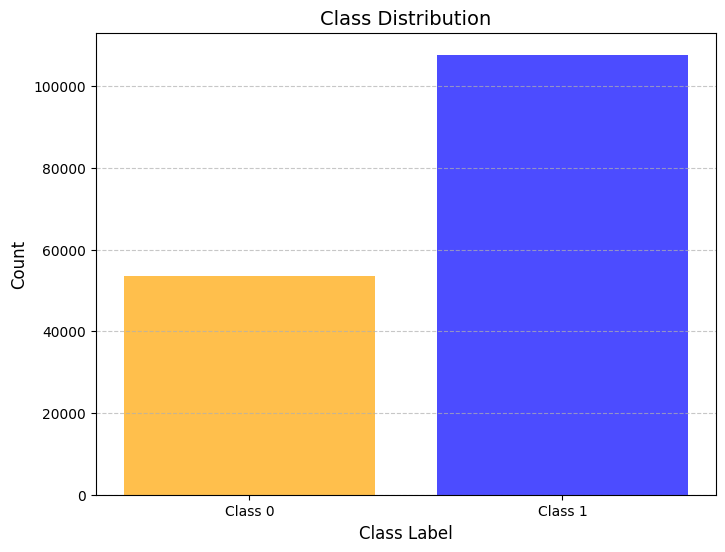

In [11]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = y.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'], alpha=0.7)
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])


In [20]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [21]:
y_pred = pipeline.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9075015499070056
Precision: 0.8907506420241653
Recall: 0.9819464426602311
F1 Score: 0.9341280353200883
              precision    recall  f1-score   support

           0       0.95      0.76      0.84     10713
           1       0.89      0.98      0.93     21547

    accuracy                           0.91     32260
   macro avg       0.92      0.87      0.89     32260
weighted avg       0.91      0.91      0.90     32260



In [23]:
import joblib

# Save the trained model pipeline
joblib.dump(pipeline, 'text_classification_model.joblib')


['text_classification_model.joblib']

In [26]:
pipinstall spacy



SyntaxError: invalid syntax (24837152.py, line 1)